In [1]:
from qiskit import *
from qiskit.visualization import *
from qiskit.providers.ibmq import *
from qiskit.providers.ibmq.job import job_monitor
from qiskit.providers.aer import AerSimulator

/opt/conda/lib/python3.10/site-packages/qiskit/visualization/circuit/matplotlib.py:266: FutureWarning: The default matplotlib drawer scheme will be changed to "iqp" in a following release. To silence this warning, specify the current default explicitly as style="clifford", or the new default as style="iqp".
  self._style, def_font_ratio = load_style(self._style)


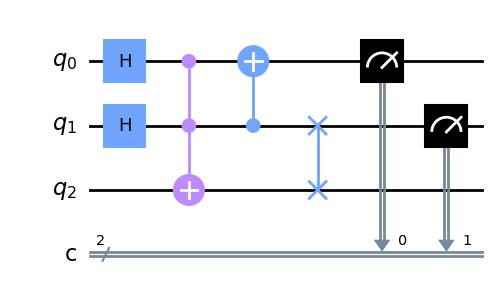

In [2]:
half_adder = QuantumCircuit(3,2)

half_adder.h(0)
half_adder.h(1)
half_adder.ccx(0,1,2)
half_adder.cx(1,0)
half_adder.swap(1,2)
half_adder.measure(range(2),range(2))

half_adder.draw(output='mpl')

입력은 3개 qbit, 출력은 2개 qbit -> 남는 비트를 ancilla비트라고 함

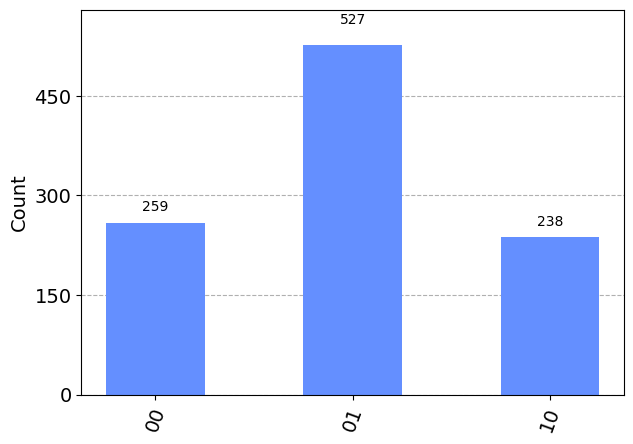

In [3]:
sim = AerSimulator()

job = execute(half_adder,sim,shots=1024)
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

[<IBMQBackend('ibm_brisbane') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_kyoto') from IBMQ(hub='ibm-q', group='open', project='main')>, <IBMQBackend('ibm_osaka') from IBMQ(hub='ibm-q', group='open', project='main')>]
Job Status: job has successfully run               


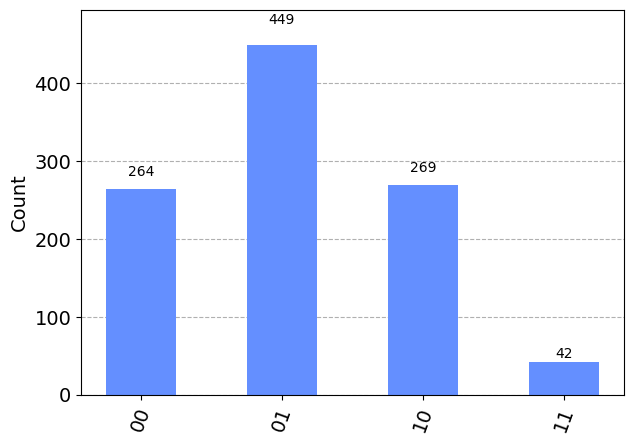

In [4]:
provider = IBMQ.load_account()
print(provider.backends(simulator = False))
dev_list = provider.backends(
    filters = lambda x: x.configuration().n_qubits >= 5,
    simulator = False)


dev = least_busy(dev_list)
job = execute(half_adder,dev,shots=1024)
job_monitor(job)

result = job.result()
count_dev = result.get_counts()
plot_histogram(count_dev)